In [1]:
!nvidia-smi

Sat Oct 15 14:47:20 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   51C    P8    12W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# memory footprint support libraries/code
!ln -sf /opt/bin/nvidia-smi /usr/bin/nvidia-smi
!pip install gputil
!pip install psutil
!pip install humanize
import psutil
import humanize
import os
import GPUtil as GPU
GPUs = GPU.getGPUs()
# XXX: only one GPU on Colab and isn’t guaranteed
gpu = GPUs[0]
def printm():
 process = psutil.Process(os.getpid())
 print("Gen RAM Free: " + humanize.naturalsize( psutil.virtual_memory().available ), " | Proc size: " + humanize.naturalsize( process.memory_info().rss))
 print("GPU RAM Free: {0:.0f}MB | Used: {1:.0f}MB | Util {2:3.0f}% | Total {3:.0f}MB".format(gpu.memoryFree, gpu.memoryUsed, gpu.memoryUtil*100, gpu.memoryTotal))
printm() 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=8d929edbd8f966bb102d7dd5e30aafd321e9a3989cdbd168a09f8828b1f077d9
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built gputil
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Gen RAM Free: 12.7 GB  | Proc size: 96.5 MB
GPU RAM Free: 15109MB | Used: 0MB | Util   0% | Total 15109MB


In [3]:
import torch
import torchvision
from torchvision.transforms import ToTensor, Normalize, Compose
from torchvision.datasets import MNIST

In [4]:
mnist = MNIST(root='data', 
              train = True,
              download = True, 
              transform=Compose([ToTensor(), Normalize(mean=(0.5,), std=(0.5,))])
              )

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [5]:
img, label = mnist[0]
print('label:', label)
print(img[:,10:15,10:15])
torch.min(img), torch.max(img)

label: 5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


(tensor(-1.), tensor(1.))

In [6]:
def denorm(x):
  Out = (x+1)/2
  return Out.clamp(0,1)

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5
tensor([[[-0.9922,  0.2078,  0.9843, -0.2941, -1.0000],
         [-1.0000,  0.0902,  0.9843,  0.4902, -0.9843],
         [-1.0000, -0.9137,  0.4902,  0.9843, -0.4510],
         [-1.0000, -1.0000, -0.7255,  0.8902,  0.7647],
         [-1.0000, -1.0000, -1.0000, -0.3647,  0.8824]]])


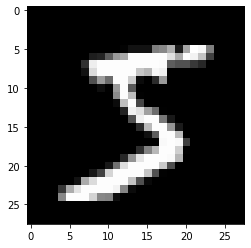

In [8]:
img_norm = denorm(img)
plt.imshow(img_norm[0], cmap = 'gray')
print('Label:', label)
print(img[:,10:15,10:15])

In [9]:
print(img_norm[:,10:15,10:15])

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])


# DEVICE CONFIGURATION

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

#DataLoaders

In [11]:
from torch.utils.data import DataLoader
batch_size = 100
dataloader = DataLoader(mnist,batch_size, shuffle = True)

first batch:
torch.Size([100, 1, 28, 28])
tensor([2, 3, 3, 7, 8, 5, 8, 2, 4, 9, 2, 6, 1, 1, 2, 0, 7, 8, 6, 7, 2, 0, 7, 0,
        0, 3, 0, 1, 4, 7, 1, 7, 4, 8, 8, 0, 6, 0, 2, 1, 4, 0, 2, 7, 0, 9, 7, 6,
        7, 9, 3, 7, 1, 4, 7, 7, 4, 0, 3, 4, 8, 3, 8, 2, 3, 4, 7, 2, 1, 9, 1, 0,
        4, 9, 7, 5, 0, 9, 9, 3, 5, 1, 5, 1, 3, 3, 7, 4, 3, 5, 1, 9, 5, 3, 3, 9,
        4, 1, 8, 5])


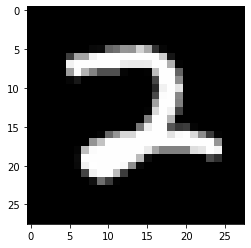

In [12]:
for img_batch, label_batch in dataloader:
  print('first batch:')
  print(img_batch.shape)
  plt.imshow(img_batch[0][0], cmap = 'gray')
  print(label_batch)
  break

#Discriminator

In [13]:
image_size = 784      #input_size
hidden_size = 256     

In [14]:
import torch.nn as nn
Discriminator = nn.Sequential(
                              nn.Linear(image_size, hidden_size),
                              nn.LeakyReLU(0.2),
                              nn.Linear(hidden_size, hidden_size),
                              nn.LeakyReLU(0.2),
                              nn.Linear(hidden_size, 1),
                              nn.Sigmoid()
                              )
#with LeakyRelu of 0.2 

In [15]:
Discriminator.to(device)

Sequential(
  (0): Linear(in_features=784, out_features=256, bias=True)
  (1): LeakyReLU(negative_slope=0.2)
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): LeakyReLU(negative_slope=0.2)
  (4): Linear(in_features=256, out_features=1, bias=True)
  (5): Sigmoid()
)

#Generator

In [16]:
latent_size = 64    #input vector size

Generator = nn.Sequential(nn.Linear(latent_size, hidden_size),
                          nn.ReLU(),
                          nn.Linear(hidden_size, hidden_size),
                          nn.ReLU(),
                          nn.Linear(hidden_size, image_size),
                          nn.Tanh()
                          )

In [17]:
y = Generator(torch.randn(2,latent_size))   #Generate 2 random vectors of latent_size(64)
y.shape

torch.Size([2, 784])

In [18]:
gen_imgs = denorm(y.reshape((-1, 28,28)).detach())
gen_imgs.shape

torch.Size([2, 28, 28])

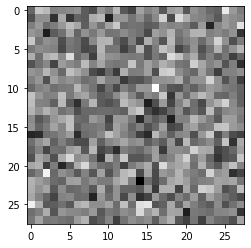

In [19]:
plt.imshow(gen_imgs[0], cmap='gray')

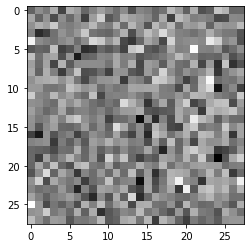

In [20]:
plt.imshow(gen_imgs[1], cmap='gray')

In [21]:
Generator.to(device)

Sequential(
  (0): Linear(in_features=64, out_features=256, bias=True)
  (1): ReLU()
  (2): Linear(in_features=256, out_features=256, bias=True)
  (3): ReLU()
  (4): Linear(in_features=256, out_features=784, bias=True)
  (5): Tanh()
)

# Train Discriminator

In [22]:

Criterion = nn.BCELoss()
Discriminator_optimizer = torch.optim.Adam(Discriminator.parameters(), lr = 0.0002)   
Generator_optimizer = torch.optim.Adam(Generator.parameters(), lr = 0.0002)           

In [23]:
def reset_grad():
  Discriminator_optimizer.zero_grad()
  Generator_optimizer.zero_grad()

In [24]:
def train_discriminator(images):

  real_labels = torch.ones(batch_size,1).to(device)          
  fake_labels = torch.zeros(batch_size,1).to(device)



  Outputs = Discriminator(images)
  d_loss_real = Criterion(Outputs, real_labels)
  real_score = Outputs


  z = torch.randn(batch_size, latent_size).to(device)
  fake_images = Generator(z)
  Outputs = Discriminator(fake_images)
  d_loss_fake = Criterion(Outputs, fake_labels)
  fake_score = Outputs

  
  d_loss = d_loss_real + d_loss_fake



  reset_grad()
  d_loss.backward()
  Discriminator_optimizer.step()
  return d_loss, real_score, fake_score

# Train Generator

In [25]:
def train_generator():
  z = torch.randn(batch_size, latent_size).to(device)
  fake_images = Generator(z)
  labels = torch.ones(batch_size, 1).to(device)

  g_loss = Criterion(Discriminator(fake_images), labels)
  reset_grad()
  g_loss.backward()
  Generator_optimizer.step()
  return g_loss, fake_images

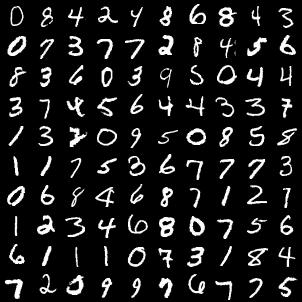

In [26]:
import os
sample_dir = 'samples'
if not os.path.exists(sample_dir):
  os.makedirs(sample_dir)

from IPython.display import Image
from torchvision.utils import save_image

for images,_ in dataloader:
  images = images.reshape(images.size(0),1,28,28)
  save_image(denorm(images),os.path.join(sample_dir, 'real_images.png'), nrow = 10)
  break
Image(os.path.join(sample_dir, 'real_images.png'))


In [27]:
sample_vectors = torch.randn(batch_size, latent_size).to(device)

In [28]:
def save_fake_images(index):
  fake_images = Generator(sample_vectors)
  fake_images = fake_images.reshape(fake_images.size(0), 1,28,28)

  fake_fname = 'fake_images-{0:0=4d}.png'.format(index)
  print('saving:', fake_fname)
  save_image(denorm(fake_images), os.path.join(sample_dir, fake_fname), nrow = 10)

saving: fake_images-0000.png


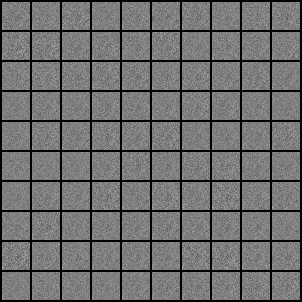

In [29]:
save_fake_images(0)
Image(os.path.join(sample_dir, 'fake_images-0000.png'))

In [30]:
num_epochs = 300
total_step = len(dataloader)
d_losses, g_losses, real_scores, fake_scores = [],[],[],[]

#Training:

In [31]:
%%time

for epoch in range(num_epochs):
    for i, (images, _) in enumerate(dataloader):
        # Load a batch & transform to vectors
        images = images.reshape(batch_size, -1).to(device)
        
        # Train the discriminator and generator
        d_loss, real_score, fake_score = train_discriminator(images)
        g_loss, fake_images = train_generator()
        
        # Inspect the losses
        if (i+1) % 200 == 0:
            d_losses.append(d_loss.item())
            g_losses.append(g_loss.item())
            real_scores.append(real_score.mean().item())
            fake_scores.append(fake_score.mean().item())
            print('Epoch [{}/{}], Step [{}/{}], d_loss: {:.4f}, g_loss: {:.4f}, D(x): {:.2f}, D(G(z)): {:.2f}' 
                  .format(epoch, num_epochs, i+1, total_step, d_loss.item(), g_loss.item(), 
                          real_score.mean().item(), fake_score.mean().item()))
  
    # Sample and save images
    save_fake_images(epoch+1)   


Epoch [0/300], Step [200/600], d_loss: 0.0486, g_loss: 4.2207, D(x): 0.99, D(G(z)): 0.04
Epoch [0/300], Step [400/600], d_loss: 0.0742, g_loss: 4.8066, D(x): 0.99, D(G(z)): 0.06
Epoch [0/300], Step [600/600], d_loss: 0.2382, g_loss: 4.1128, D(x): 0.96, D(G(z)): 0.17
saving: fake_images-0001.png
Epoch [1/300], Step [200/600], d_loss: 0.1422, g_loss: 6.0562, D(x): 0.94, D(G(z)): 0.05
Epoch [1/300], Step [400/600], d_loss: 0.3510, g_loss: 4.4004, D(x): 0.90, D(G(z)): 0.14
Epoch [1/300], Step [600/600], d_loss: 0.2094, g_loss: 5.3434, D(x): 0.89, D(G(z)): 0.01
saving: fake_images-0002.png
Epoch [2/300], Step [200/600], d_loss: 0.5692, g_loss: 2.8705, D(x): 0.79, D(G(z)): 0.14
Epoch [2/300], Step [400/600], d_loss: 0.1133, g_loss: 4.9098, D(x): 0.96, D(G(z)): 0.04
Epoch [2/300], Step [600/600], d_loss: 0.7493, g_loss: 2.8154, D(x): 0.88, D(G(z)): 0.34
saving: fake_images-0003.png
Epoch [3/300], Step [200/600], d_loss: 0.4799, g_loss: 3.2003, D(x): 0.87, D(G(z)): 0.22
Epoch [3/300], Step [40

#Save Models


In [32]:
torch.save(Generator.state_dict(), 'Generator.ckpt')
torch.save(Discriminator.state_dict(), 'Discriminator.ckpt')

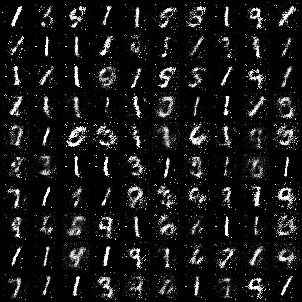

In [33]:
Image('./samples/fake_images-0050.png')

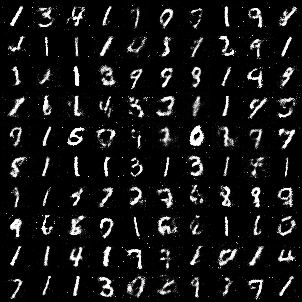

In [34]:
Image('./samples/fake_images-0100.png')

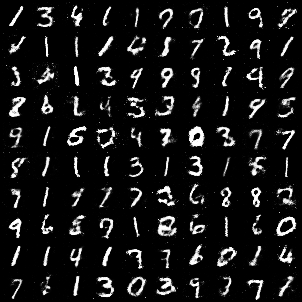

In [35]:
Image('./samples/fake_images-0150.png')

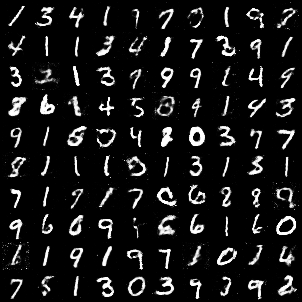

In [36]:
Image('./samples/fake_images-0300.png')

In [38]:
import cv2
import os
from IPython.display import FileLink

vid_fname = 'gans_training.avi'

files = [os.path.join(sample_dir, f) for f in os.listdir(sample_dir) if 'fake_images' in f]
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 8, (302,302))
[out.write(cv2.imread(fname)) for fname in files]
out.release()
FileLink('gans_training.avi')

/content/gans_training.avi

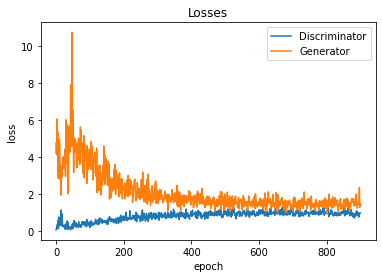

In [39]:
plt.plot(d_losses, '-')
plt.plot(g_losses, '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

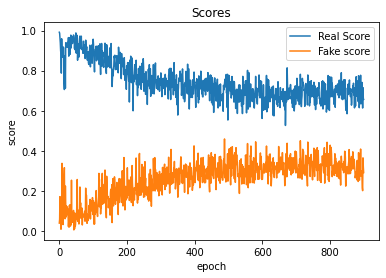

In [40]:
plt.plot(real_scores, '-')
plt.plot(fake_scores, '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');

In [44]:
!zip -r /content/samples.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/active_config (stored 0%)
  adding: content/.config/.last_update_check.json (deflated 22%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2022.10.07/ (stored 0%)
  adding: content/.config/logs/2022.10.07/13.34.49.852351.log (deflated 55%)
  adding: content/.config/logs/2022.10.07/13.34.50.628315.log (deflated 53%)
  adding: content/.config/logs/2022.10.07/13.34.17.754134.log (deflated 86%)
  adding: content/.config/logs/2022.10.07/13.33.29.962578.log (deflated 91%)
  adding: content/.config/logs/2022.10.07/13.33.55.059309.log (deflated 53%)
  adding: content/.config/logs/2022.10.07/13.34.26.675197.log (deflated 53%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
 